# 1. 데이터 불러오기

In [2]:
import os
os.chdir('C:/Users/HOME/Desktop/수DA쟁이/개별과제_망했누_ㅜㅜ;')

In [3]:
import pandas as pd
import numpy as np

train=pd.read_csv('train_features.csv')
train_labels=pd.read_csv('train_labels.csv')
test=pd.read_csv('test_features.csv')
submission=pd.read_csv('sample_submission.csv')

# 2. 데이터 살펴보기

In [4]:
train.head()

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
0,0,0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112
1,0,1,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216
2,0,2,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629
3,0,3,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013
4,0,4,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234


In [5]:
test.head()

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
0,3125,0,-0.628100,-0.160155,0.151487,49.665357,88.435961,13.597668
1,3125,1,-0.462548,0.012462,-0.053726,56.953059,96.185341,16.278458
2,3125,2,-0.363481,-0.091789,-0.130004,29.557396,93.836453,13.329043
3,3125,3,-0.351750,-0.239870,-0.193053,23.686172,88.608721,13.449771
4,3125,4,-0.312934,-0.123762,-0.318621,20.410071,85.327707,13.884912


In [102]:
train_labels.head()

,id,label,label_desc
0,0,37,Shoulder Press (dumbbell)
1,1,26,Non-Exercise
2,2,3,Biceps Curl (band)
3,3,26,Non-Exercise
4,4,26,Non-Exercise


In [7]:
train.shape

(1875000, 8)

In [8]:
train['id'].value_counts()

2047    600
1347    600
2378    600
1354    600
2379    600
       ... 
1699    600
675     600
2722    600
1698    600
0       600
Name: id, Length: 3125, dtype: int64

In [15]:
train_id = train['id']

train_id[train_id==2].count

<bound method Series.count of 1200    2
1201    2
1202    2
1203    2
1204    2
       ..
1795    2
1796    2
1797    2
1798    2
1799    2
Name: id, Length: 600, dtype: int64>

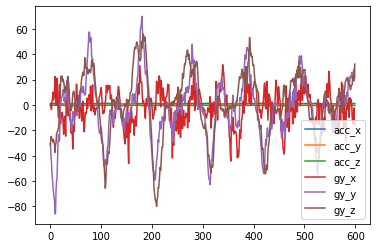

In [17]:
# id 별 동작들의 흐름 살펴보기

# id = 0 이면 Siulder Press(dumbell)
ex = train[train['id']==0]

ex.iloc[:,2:].plot()

In [18]:
train_labels[train_labels['id']==0]

,id,label,label_desc
0,0,37,Shoulder Press (dumbbell)


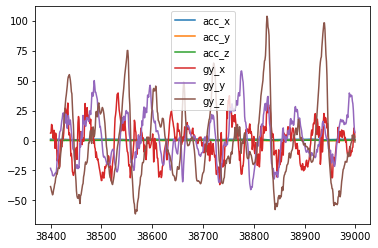

In [23]:
ex = train[train['id']==64]

ex.iloc[:,2:].plot()

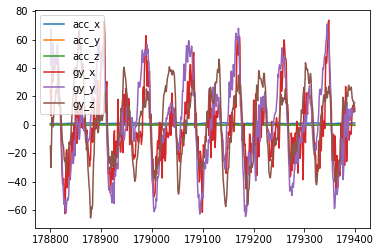

In [21]:
ex = train[train['id']==298]

ex.iloc[:,2:].plot()

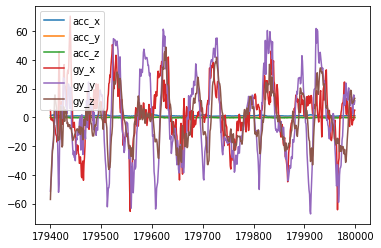

In [22]:
ex = train[train['id']==299]

ex.iloc[:,2:].plot()

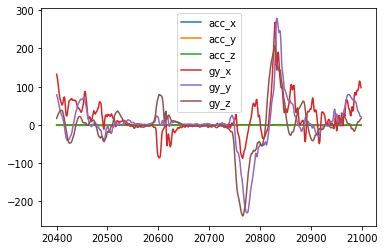

In [20]:
ex = train[train['id']==34]

ex.iloc[:,2:].plot()

In [25]:
train_labels['label_desc'].unique

<bound method Series.unique of 0                Shoulder Press (dumbbell)
1                             Non-Exercise
2                       Biceps Curl (band)
3                             Non-Exercise
4                             Non-Exercise
                       ...                
3120                          Non-Exercise
3121                          Non-Exercise
3122    Dynamic Stretch (at your own pace)
3123                          Non-Exercise
3124                            Bicep Curl
Name: label_desc, Length: 3125, dtype: object>

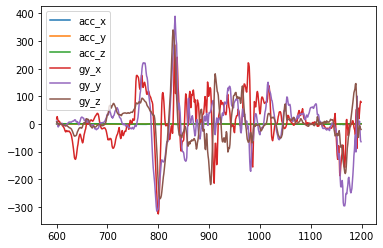

In [26]:
#운동이 아니래영,, 머쓱 ,,
ex = train[train['id']==1]

ex.iloc[:,2:].plot()

In [27]:
train.isnull().sum() # 클린하노

id       0
time     0
acc_x    0
acc_y    0
acc_z    0
gy_x     0
gy_y     0
gy_z     0
dtype: int64

In [29]:
train_labels

,id,label,label_desc
0,0,37,Shoulder Press (dumbbell)
1,1,26,Non-Exercise
2,2,3,Biceps Curl (band)
3,3,26,Non-Exercise
4,4,26,Non-Exercise
...,...,...,...
3120,3120,26,Non-Exercise
3121,3121,26,Non-Exercise
3122,3122,15,Dynamic Stretch (at your own pace)
3123,3123,26,Non-Exercise


In [43]:
train_labels['label'].unique()

array([37, 26,  3, 39, 28,  6, 60, 35, 34, 30, 59, 15, 40, 50, 48,  8, 54,
       16,  4, 58, 21, 18, 51, 25, 24, 17, 49, 47, 27, 36,  2, 38, 14, 10,
       55, 57,  0,  1, 46, 43, 52, 53,  5, 56, 23, 44, 42, 19, 32, 45, 29,
       31, 11,  7, 41, 12,  9, 20, 13, 22, 33], dtype=int64)

In [40]:
a = train_labels['label'].unique()

In [41]:
a.sort()

In [42]:
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60], dtype=int64)

In [57]:
b = pd.Series(train_labels['label'])

In [58]:
b

0       37
1       26
2        3
3       26
4       26
        ..
3120    26
3121    26
3122    15
3123    26
3124     2
Name: label, Length: 3125, dtype: int64

In [61]:
b.value_counts() # 히이이이익 엄청 많네

26    1518
8       97
28      55
60      48
18      47
      ... 
53      13
52      12
13      12
12      12
0       12
Name: label, Length: 61, dtype: int64

In [94]:
b1 = b[b==26].index

In [95]:
b_1 = b.drop(b1)

In [66]:
c = pd.Series(train_labels['label_desc'])

In [64]:
c

0                Shoulder Press (dumbbell)
1                             Non-Exercise
2                       Biceps Curl (band)
3                             Non-Exercise
4                             Non-Exercise
                       ...                
3120                          Non-Exercise
3121                          Non-Exercise
3122    Dynamic Stretch (at your own pace)
3123                          Non-Exercise
3124                            Bicep Curl
Name: label_desc, Length: 3125, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60]),
 <a list of 61 Text xticklabel objects>)

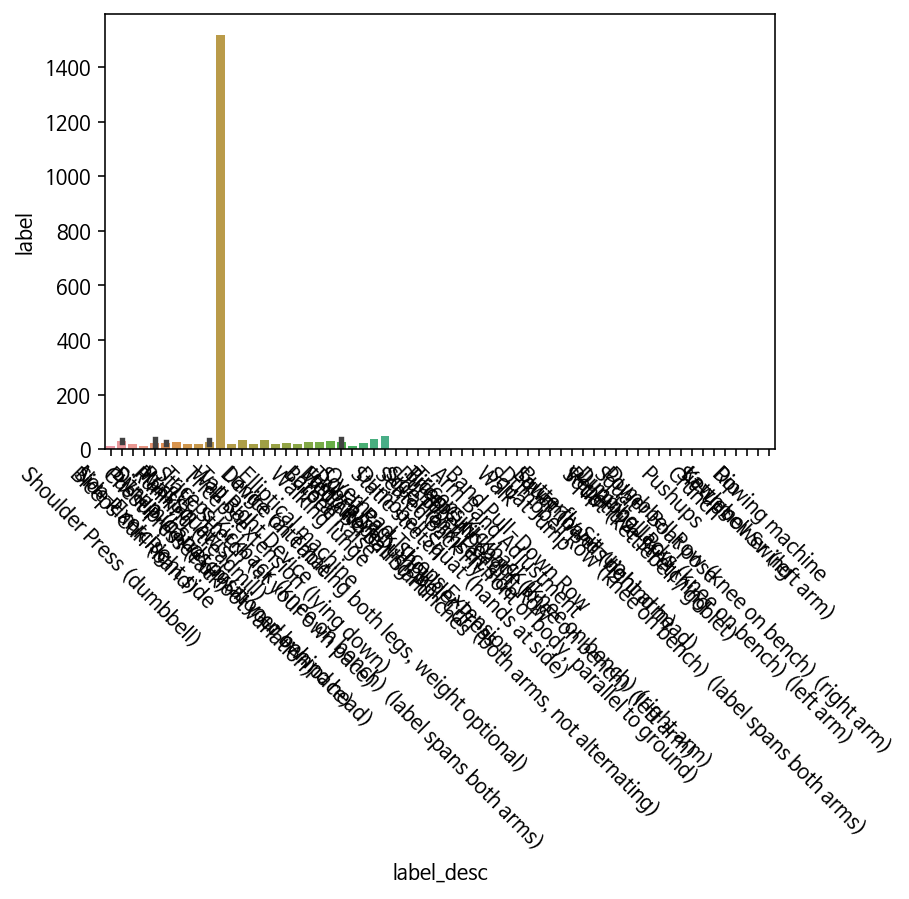

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'NanumGothic'
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%config InlineBackend.figure_format = 'retina'
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 






sns.barplot(x = train_labels['label_desc'], y = b.value_counts())
plt.xticks(rotation=-45)

In [88]:
x1 = train_labels[train_labels['label_desc']=='Non-Exercise'].index

In [89]:
x1

Int64Index([   1,    3,    4,    5,    6,    7,    8,    9,   10,   11,
            ...
            3105, 3106, 3107, 3112, 3113, 3114, 3116, 3120, 3121, 3123],
           dtype='int64', length=1518)

In [90]:
x_1 = train_labels.drop(x1)

In [91]:
x_1

,id,label,label_desc
0,0,37,Shoulder Press (dumbbell)
2,2,3,Biceps Curl (band)
12,12,39,Side Plank Right side
13,13,28,Plank
20,20,6,Chest Press (rack)
...,...,...,...
3117,3117,60,Wall Squat
3118,3118,53,Triceps Kickback (knee on bench) (right arm)
3119,3119,17,Fast Alternating Punches
3122,3122,15,Dynamic Stretch (at your own pace)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59]),
 <a list of 60 Text xticklabel objects>)

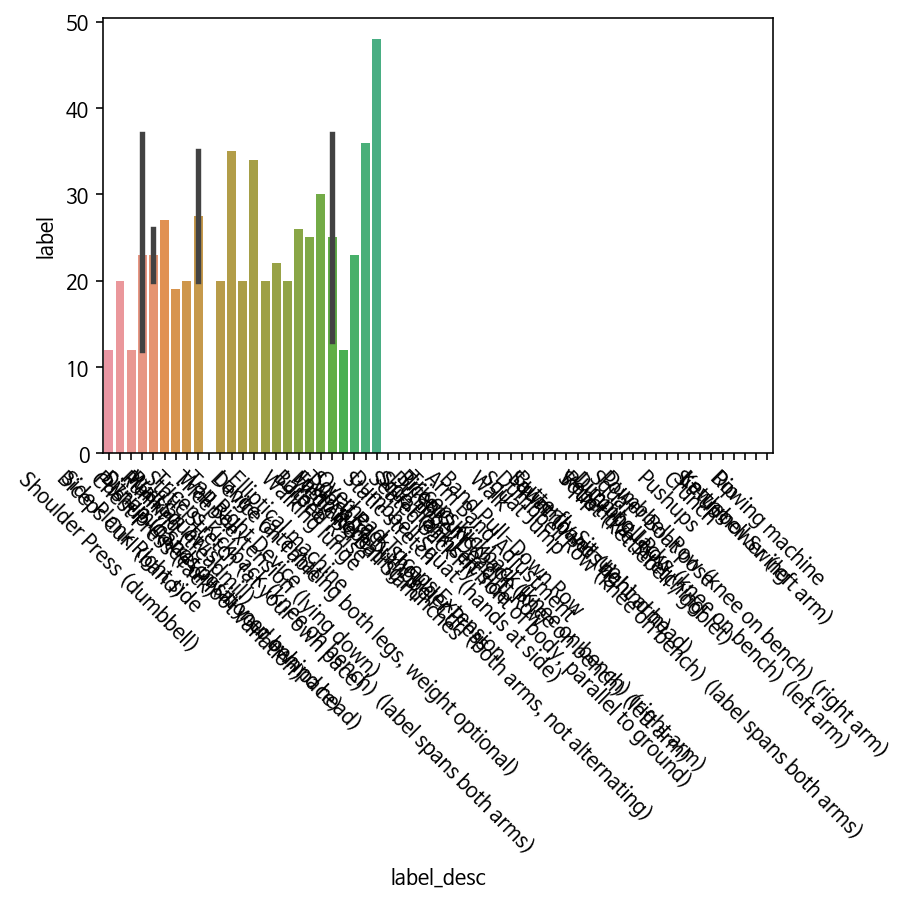

In [96]:
sns.barplot(x = x_1['label_desc'], y = b_1.value_counts())
plt.xticks(rotation=-45)

In [72]:
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3125 entries, 0 to 3124
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          3125 non-null   int64 
 1   label       3125 non-null   int64 
 2   label_desc  3125 non-null   object
dtypes: int64(2), object(1)
memory usage: 73.4+ KB


# 데이터 나누기

In [69]:
X=tf.reshape(np.array(train.iloc[:,2:]),[-1, 600, 6])
X.shape

TensorShape([3125, 600, 6])

In [97]:
import tensorflow 
from tensorflow.keras.utils import to_categorical
y =  to_categorical(train_labels['label'])

In [98]:
y.shape

(3125, 61)

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint,EarlyStopping
 
from keras.layers import Dense, LSTM

#가벼운 모델 생성
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(3125, 600, 61), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
 

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


kfold = KFold(n_splits=5, shuffle=True, random_state=0)

In [ ]:
model.fit(X,y, epochs=30, batch_size=128, validation_split=0.2)

In [119]:
y = y.reshape((3125,61))

In [120]:
X = X.reshape((3125,600,61))

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'reshape'